In [6]:
import os 
from google import genai
from google.genai import types
from dotenv import load_dotenv
load_dotenv()
# The client gets the API key from the environment variable `GEMINI_API_KEY`.
GEMINI_API_KEY=os.getenv("GEMINI_API_KEY")
if not GEMINI_API_KEY:
    print("WARNING: GEMINI_API_KEY not found in environment variables. Please set it in a .env file or directly.")

client = genai.Client(api_key=GEMINI_API_KEY)



In [8]:
import pathlib
path=pathlib.Path("rajesh.pdf")

prompt='''You are an AI assistant specialized in categorizing financial transactions.
    Analyse the pdf carefully and categorize the transactions based on their purpose.
    *Instructions:*
    1.  *Prioritize Core Purpose:* Identify the primary reason for the spending or income.
    2.  *Handle UPI Transactions:* For UPI transactions, the description often starts with generic payment details (e.g., "UPI/P2M/"). *Ignore these generic prefixes.* Focus on the *last part* of the description which typically contains the actual merchant name or purpose (e.g., "Google Pay to Starbucks", "UPI to Zomato", "Payment for Electricity Bill") *Merchant name will be also available in the starting part of the transaction ID so carefully consider it will categorizing*.
    3.  *Handle Transaction IDs/References:* Transaction descriptions may contain generic transaction IDs, reference numbers, or other identifiers (e.g., "TRN:1234567890", "Ref:XYZABC", "Bill ID:98765"). *Ignore these identifiers* and focus on the surrounding text that describes the actual spending or merchant  *Merchant name will be also available in the starting part of the transaction ID so carefully consider it will categorizing*.
    4.  *Be Specific:* Try to assign the most specific category possible.
    5.  *Use 'Others' only if truly ambiguous:* If a transaction genuinely doesn't fit any of the defined categories, use 'Others'. Do not overuse 'Others'.
    6.  *Output Format:* Provide only the category name in a JSON format like: {{"category": "Category Name"}}.
    
    try to tabulate the output in a csv
    "Date","Narration","Category"
    with these titles as head
    '''
response = client.models.generate_content(
  model="gemini-2.5-flash",
  contents=[
      types.Part.from_bytes(
        data=path.read_bytes(),
        mime_type='application/pdf',
      ),
      prompt])
# print(response)
with open("output.csv", "w", encoding="utf-8") as f:
    f.write(response.text)

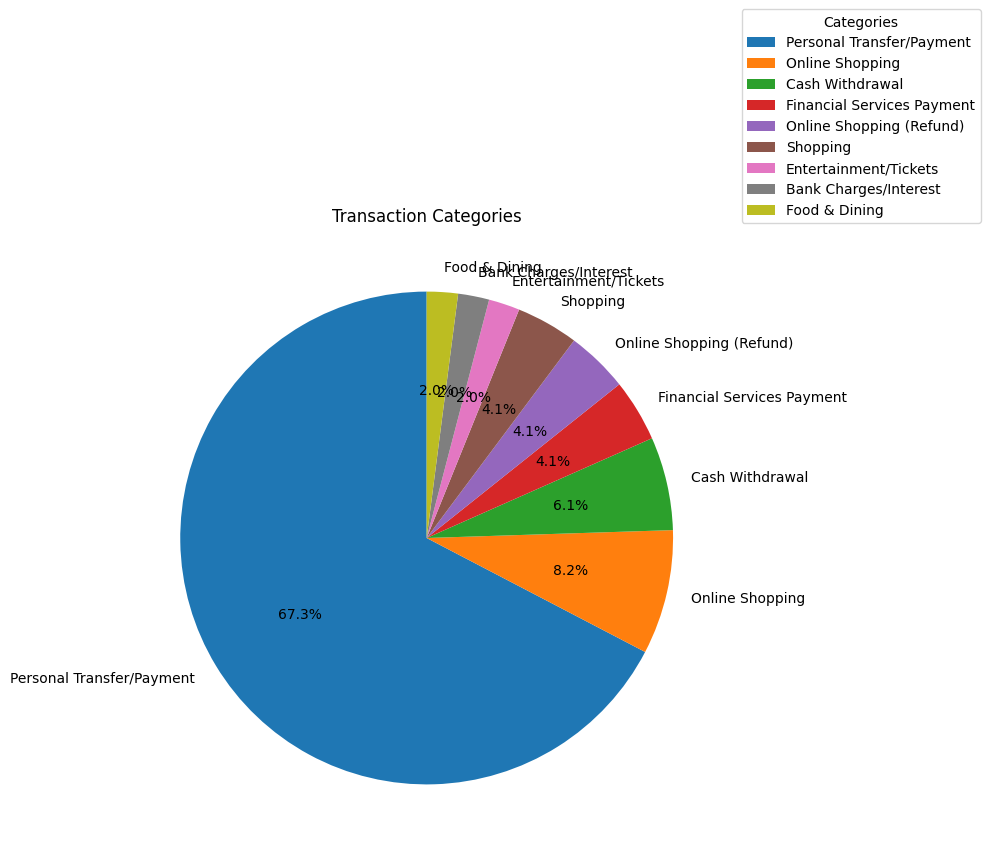

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("output.csv")
# print(df.columns)

# Count occurrences of each category
category_counts = df['Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
category_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90)
plt.title('Transaction Categories')
plt.ylabel('')
plt.legend(title="Categories", bbox_to_anchor=(1, 1))
plt.show()